# __Machine Learning Coursework 2 - Neural Network for classification__

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
train = pd.read_csv(r'C:\Users\amiru\Downloads\ML_CW\classification_training.csv')
#validation = pd.read_csv(r'C:\Users\amiru\Downloads\ML_CW\classification_test.csv')

In [ ]:
def train(X, y, hidden_size, alpha, epochs=1000):
    N_neurons = [X.shape[1], hidden_size, 1]  # X.shape[1] is the number of features (e.g., 2)
    W1, W2, b1, b2 = initialise_params(N_neurons)

    epoch_loss = 0  # Initialize loss for the epoch

    for epoch in range(epochs):
        epoch_loss = 0  # Reset epoch loss
        for i in range(len(X)):
            # Forward pass for one sample
            n1, a1, n2, a2 = forward(X[i], W1, b1, W2, b2)

            # Backward pass for one sample
            W1, W2, b1, b2 = backward(X[i], y[i], n1, a1, n2, a2, W1, W2, b1, b2, alpha)

            # Compute loss for one sample and accumulate it
            a2 = np.clip(a2, 1e-8, 1 - 1e-8)  # Stability for log
            loss = -np.mean(y[i] * np.log(a2) + (1 - y[i]) * np.log(1 - a2))
            epoch_loss += loss

        # Average loss for the epoch
        epoch_loss /= len(X)

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, Loss: {epoch_loss}")

    return W1, b1, W2, b2, epoch_loss

In [66]:
train.head()

,Unnamed: 0,x1,x2,y
0,0,0.621122,-0.414394,1
1,1,0.037911,0.940573,0
2,2,2.000955,0.189711,1
3,3,0.661071,0.756044,0
4,4,0.367782,-0.132245,1


In [67]:
train.describe()

,Unnamed: 0,x1,x2,y
count,300.000000,300.000000,300.000000,300.000000
mean,149.500000,0.499182,0.252091,0.500000
std,86.746758,0.872973,0.491010,0.500835
min,0.000000,-1.105858,-0.592602,0.000000
25%,74.750000,-0.060447,-0.173120,0.000000
50%,149.500000,0.496647,0.238589,0.500000
75%,224.250000,1.038951,0.695211,1.000000
max,299.000000,2.091171,1.049606,1.000000


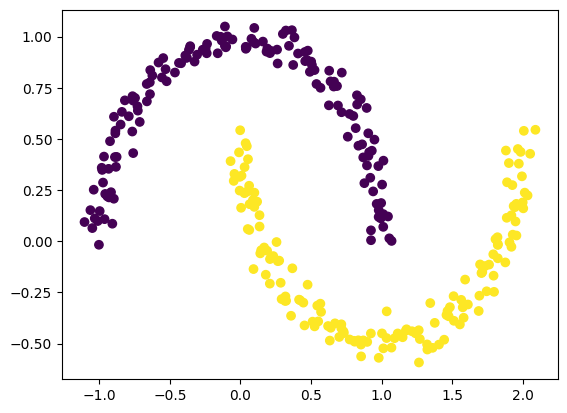

In [68]:
plt.scatter(train['x1'], train['x2'], c = train['y'])
plt.show()

In [69]:
def load_data(csv_data):
    df = pd.read_csv(csv_data)
    X = df[['x1', 'x2']].values
    y = df['y'].values.reshape(-1, 1)
    X_mean, X_std = X.mean(axis=0), X.std(axis=0)
    X = (X - X_mean) / X_std
    return X, y

In [95]:
X = train[['x1', 'x2']].values
y = train['y'].values.reshape(-1, 1)

In [97]:
print(y)

[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]


In [130]:
# Normalize input data to make sure the inputs are on the same scale
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std
print(y)

[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]


In [72]:
def initialise_params(N_Neurons) :
    #we fix the pseudo-random number generator seed so rerunning the code produces the same output.
    rng = np.random.default_rng(seed=123456) 

    #initialise the weights to a small random number between -0.015 and 0.015.
    W1 = 0.03*rng.random((N_Neurons[0], N_Neurons[1])) -0.015
    W2 = 0.03*rng.random((N_Neurons[1], N_Neurons[2])) -0.015
    b1 = np.zeros((1,N_Neurons[1]))
    b2 = np.zeros((1,N_Neurons[2]))

    return W1, W2, b1, b2

In [73]:
w1, w2, b1, b2 = initialise_params([2,15,1])
print("The shape of W1 is: ", w1.shape)
print("The shape of W2 is: ", w2.shape)
print("The shape of b1 is: ", b1.shape)
print("The shape of b2 is: ", b2.shape)

The shape of W1 is:  (2, 15)
The shape of W2 is:  (15, 1)
The shape of b1 is:  (1, 15)
The shape of b2 is:  (1, 1)


In [74]:
def Grad_tanh(x) :
    return 1. - np.tanh(x)**2

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def tanh(z):
    return np.tanh(z)


In [89]:
def forward(x,w1,b1,w2,b2) :
    """
    Input: 
        x (a feature vector from a single example)

    Outputs:
        n1 (the activation potential for the hidden layer)
        a1 (the activated output of the hidden layer)
        n2 (the activation potential for the output layer)
        a2 (the activated output of the output layer)
    """ 


    n1 = np.dot(x, w1) + b1
    A1 = tanh(n1)
    n2 = np.dot(A1, w2) + b2
    A2 = sigmoid(n2)
    return n1, A1, n2, A2
    

In [113]:
def cost(X, Y, W1, W2, b1, b2):
    """
    Input:
        X (the full training set of feature vectors)
        Y (the full training set of labels)
        W1 (the weights matrix for the hidden layer)
        W2 (the weights matrix for the output layer)
        b1 (the bias vector for the hidden layer)
        b2 (the bias vector for the output layer)

    Output:
        c (the cost)
    """
    
    c=0.
    
    
    _, _, _, a2 = forward(X, w1, w2, b1, b2)
    #c += -Y[i]*np.log(a2) - (1-Y[i])*np.log(1-a2)

    c = -np.mean(Y * np.log(a2) + (1 - Y) * np.log(1 - a2))
    
    return c

In [106]:
def backward(x, y, n1, a1, n2, a2, W1, W2, b1, b2, alpha):
    """
    ==========================================================
    Backward Pass for a Two-Layer Neural Network using Binary Cross-Entropy Loss

    Inputs:
        x (numpy.ndarray): Input features for the batch.
                           Shape: (batch_size, input_dim)
        y (numpy.ndarray): True labels for the batch.
                           Shape: (batch_size, 1)
        n1 (numpy.ndarray): Activation potentials for the hidden layer.
                            Shape: (batch_size, hidden_dim)
        a1 (numpy.ndarray): Activated outputs from the hidden layer.
                            Shape: (batch_size, hidden_dim)
        n2 (numpy.ndarray): Activation potentials for the output layer.
                            Shape: (batch_size, 1)
        a2 (numpy.ndarray): Activated outputs from the output layer (predictions).
                            Shape: (batch_size, 1)
        W1 (numpy.ndarray): Weights matrix for the hidden layer.
                            Shape: (input_dim, hidden_dim)
        W2 (numpy.ndarray): Weights matrix for the output layer.
                            Shape: (hidden_dim, 1)
        b1 (numpy.ndarray): Bias vector for the hidden layer.
                            Shape: (1, hidden_dim)
        b2 (numpy.ndarray): Bias vector for the output layer.
                            Shape: (1, 1)
        alpha (float): Learning rate for the parameter updates.

    Outputs:
        W1 (numpy.ndarray): Updated weights matrix for the hidden layer.
        W2 (numpy.ndarray): Updated weights matrix for the output layer.
        b1 (numpy.ndarray): Updated bias vector for the hidden layer.
        b2 (numpy.ndarray): Updated bias vector for the output layer.
    ==========================================================
    """
 

    ### Step 1: Compute the Gradient of the Loss w.r. to the Output Activation (a2)
    """
    Binary Cross-Entropy Loss:
        L = -y * log(a2) - (1 - y) * log(1 - a2)
    
    Gradient of Loss w.r. to a2:
        dL/da2 = -y/a2 + (1 - y)/(1 - a2)
    """
    dL_da2 = -(y / a2) + ((1 - y) / (1 - a2))  # Shape: (batch_size, 1)

    ### Step 2: Compute the Gradient of the Output Activation (a2) w.r. to n2
    """
    Activation Function at Output Layer:
        a2 = sigmoid(n2)
    
    Gradient of a2 w.r. to n2:
        da2_dn2 = sigmoid(n2) * (1 - sigmoid(n2))
    """
    da2_dn2 = sigmoid_derivative(n2)       # Shape: (batch_size, 1)
    

    ### Step 3: Compute the Gradient of the Loss w.r. to n2
    """
    Using the Chain Rule:
        dL/dn2 = dL/da2 * da2_dn2
    """
    dL_dn2 = dL_da2 * da2_dn2              # Shape: (batch_size, 1)
    

    ### Step 4: Compute the Gradients w.r. to W2 and b2
    """
    Gradients for Output Layer Weights (W2) and Biases (b2):
        dL/dW2 = a1^T * dL/dn2
        dL/db2 = sum(dL/dn2) over the batch
    """
    dL_dW2 = np.dot(a1.T, dL_dn2)          # Shape: (hidden_dim, 1)
    dL_db2 = np.sum(dL_dn2, axis=0, keepdims=True)  # Shape: (1, 1)
    

    ### Step 5: Compute the Gradient of the Loss w.r. to the Hidden Layer Activation (a1)
    """
    Using the Chain Rule:
        dL/da1 = dL/dn2 * W2^T
    """
    dL_da1 = np.dot(dL_dn2, W2.T)          # Shape: (batch_size, hidden_dim)

    ### Step 6: Compute the Gradient of the Hidden Activation (a1) w.r. to n1
    """
    Activation Function at Hidden Layer:
        a1 = tanh(n1)
    
    Gradient of a1 w.r. to n1:
        da1_dn1 = 1 - tanh^2(n1)
    """
    da1_dn1 = Grad_tanh(n1)                # Shape: (batch_size, hidden_dim)

    ### Step 7: Compute the Gradient of the Loss w.r. to n1
    """
    Using the Chain Rule:
        dL/dn1 = dL/da1 * da1_dn1
    """
    dL_dn1 = dL_da1 * da1_dn1               # Shape: (batch_size, hidden_dim)

    ### Step 8: Compute the Gradients w.r. to W1 and b1
    """
    Gradients for Hidden Layer Weights (W1) and Biases (b1):
        dL/dW1 = x^T * dL/dn1
        dL/db1 = sum(dL/dn1) over the batch
    """
    dL_dW1 = np.dot(x.T, dL_dn1)           # Shape: (input_dim, hidden_dim)
    dL_db1 = np.sum(dL_dn1, axis=0, keepdims=True)  # Shape: (1, hidden_dim)

    ### Step 9: Update the Weights and Biases using Stochastic Gradient Descent (SGD)
    """
    Parameter Updates:
        W = W - alpha * dL/dW
        b = b - alpha * dL/db
    """
    W2 -= alpha * dL_dW2                    # Shape: (hidden_dim, 1)
    b2 -= alpha * dL_db2                    # Shape: (1, 1)
    W1 -= alpha * dL_dW1                    # Shape: (input_dim, hidden_dim)
    b1 -= alpha * dL_db1                    # Shape: (1, hidden_dim)

    ### Step 10: Return the Updated Parameters
    """
    Return the updated weights and biases for the next iteration.
    """
    return W1, W2, b1, b2

In [114]:
n1, a1, n2, a2 = forward(X, w1, b1, w2, b2)
W1, W2, b1, b2 = backward(X, y, n1, a1, n2, a2, w1, w2, b1, b2, alpha=0.001)
print("The shape of W1 is: ", W1.shape)


The shape of W1 is:  (2, 15)


In [126]:
def train(X, y, hidden_size, alpha, epochs=1000):
    """
    X: Input data
    y: Target labels
    hidden_size: Number of neurons in the hidden layer
    alpha: Learning rate for gradient descent
    epochs: Number of training epochs
    
    """
    
    # Initialize weights and biases
    w1, w2, b1, b2 = initialise_params(hidden_size)
    
    # Define activation functions
    def Grad_tanh(x) :
        return 1. - np.tanh(x)**2

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))


    def sigmoid_derivative(z):
        return sigmoid(z) * (1 - sigmoid(z))

    def tanh(z):
        return np.tanh(z)

    # Training loop
    for j in range(epochs):
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        #X_shuff = X[indices]
        #Y_shuff = y[indices]

        for i in range(len(X)):
            # Forward pass
            n1, a1, n2, a2 = forward(X, w1, b1, w2, b2)

            # Backward pass
            W1, W2, b1, b2 = backward(X, y, n1, a1, n2, a2, w1, w2, b1, b2, alpha)

            # Loss (binary cross-entropy)
            loss = -np.mean(y * np.log(a2 + 1e-8) + (1 - y) * np.log(1 - a2 + 1e-8))

        if i % 100 == 0:
            print(f"Epoch: {i}, Loss: {loss}")
       

    return W1, b1, W2, b2, loss
    

In [128]:
def train(X, y, hidden_size, alpha, epochs=1000):
    """
    X: Input data
    y: Target labels
    hidden_size: Number of neurons in the hidden layer
    alpha: Learning rate for gradient descent
    epochs: Number of training epochs
    """
    
    # Initialize weights and biases
    w1, w2, b1, b2 = initialise_params(hidden_size)
    
    # Define activation functions outside of the loop
    def Grad_tanh(x):
        return 1. - np.tanh(x)**2

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(z):
        return sigmoid(z) * (1 - sigmoid(z))

    def tanh(z):
        return np.tanh(z)

    # Training loop
    for j in range(epochs):
        indices = np.arange(len(X))
        np.random.shuffle(indices)

        for i in range(len(X)):
            # Forward pass
            n1, a1, n2, a2 = forward(X[i], w1, b1, w2, b2)

            # Backward pass
            W1, W2, b1, b2 = backward(X[i], y[i], n1, a1, n2, a2, w1, w2, b1, b2, alpha)

            # Loss (binary cross-entropy)
            a2 = np.clip(a2, 1e-8, 1 - 1e-8)  # Stability for log
            loss = -np.mean(y[i] * np.log(a2) + (1 - y[i]) * np.log(1 - a2))

        if j % 100 == 0:
            print(f"Epoch: {j}, Loss: {loss}")
    
    return W1, b1, W2, b2, loss


In [129]:
# Hyperparameter search
neuron_values = [5, 10, 15]  # List of possible numbers of neurons for the hidden layer
learning_rates = [0.01, 0.05, 0.1]  # List of possible learning rates
best_loss = float('inf')  # Initialize best loss with a high value
best_params = {}

# Loop over all combinations of neurons and learning rates
for neurons in neuron_values:
    for lr in learning_rates:
        # Define the hidden sizes as [2, neurons, 1]
        hidden_size = [2, neurons, 1]
        
        # Train the model with the current set of parameters
        W1, b1, W2, b2, loss = train(X, y, hidden_size=hidden_size, alpha=lr)  
        
        # Print the current results
        print(f"Hidden size: {hidden_size}, Learning rate: {lr}, Loss: {loss}")
        
        # Update the best loss and parameters if we find a new best loss
        if loss < best_loss:
            best_loss = loss
            best_params = {'hidden_size': hidden_size, 'learning_rate': lr, 'W1': W1.shape, 'b1': b1.shape, 'W2': W2.shape, 'b2': b2.shape}

# Print the best parameters and corresponding loss
print(f"Best params: {best_params}, Best loss: {best_loss:}")


ValueError: shapes (2,) and (1,5) not aligned: 2 (dim 0) != 1 (dim 0)

In [ ]:
def load_data(csv_data):
    df = pd.read_csv(csv_data)
    X = df[['x1', 'x2']].values
    y = df['y'].values.reshape(-1, 1)
    X_mean, X_std = X.mean(axis=0), X.std(axis=0)
    X = (X - X_mean) / X_std
    return X, y

In [46]:
# Visualize decision boundary
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
grid_points_norm = (grid_points - X_mean) / X_std

Z1_grid, A1_grid, Z2_grid, A2_grid = forward(grid_points_norm, W1, b1, W2, b2)

decision_boundary = A2_grid.reshape(x1_grid.shape)

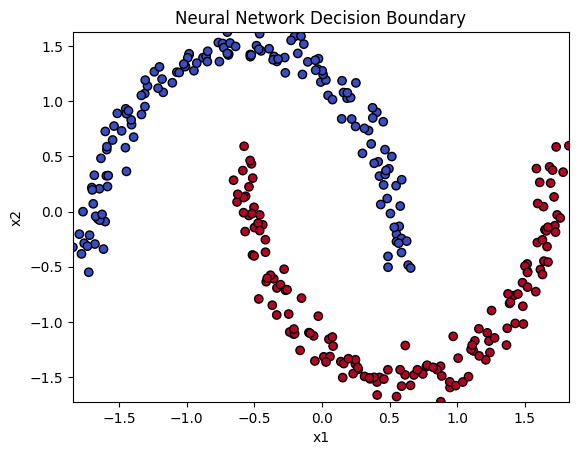

In [47]:
plt.contourf(x1_grid, x2_grid, decision_boundary, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='coolwarm', edgecolors='k')
plt.title("Neural Network Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Validating the neural network ###

In [21]:
val_X, val_y = load_data('classification_test.csv')

In [ ]:
def train(X, y, hidden_size, alpha, epochs=1000):
    """
    X: Input data
    y: Target labels
    hidden_size: Number of neurons in the hidden layer
    alpha: Learning rate for gradient descent
    epochs: Number of training epochs
    
    """
    
    # Initialize weights and biases
    w1, w2, b1, b2 = initialise_params(hidden_size)
    
    # Define activation functions
    def Grad_tanh(x) :
        return 1. - np.tanh(x)**2

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))


    def sigmoid_derivative(z):
        return sigmoid(z) * (1 - sigmoid(z))

    def tanh(z):
        return np.tanh(z)

    # Training loop
    for i in range(epochs):
        # Forward pass
        n1, a1, n2, a2 = forward(X, w1, b1, w2, b2)

       # Backward pass
        W1, W2, b1, b2 = backward(X, y, n1, a1, n2, a2, W1, W2, b1, b2, alpha)

        # Compute loss
        # Loss (binary cross-entropy)
        loss = -np.mean(y * np.log(a2 + 1e-8) + (1 - y) * np.log(1 - a2 + 1e-8))

        if i % 100 == 0:
            print(f"Epoch: {i}, Loss: {loss}")

    return W1, b1, W2, b2, loss
    

In [123]:
# Hyperparameter search
hidden_sizes = [5, 10, 15]
learning_rates = [0.01, 0.05, 0.1]
best_loss = float('inf')
best_params = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        W1, b1, W2, b2, loss = train(X, y, hidden_size=hidden_size, alpha=learning_rates)
        print(f"Hidden size: {hidden_size}, Learning rate: {lr}, Loss: {loss:.4f}")
        if loss < best_loss:
            best_loss = loss
            best_params = {'hidden_size': hidden_size, 'learning_rate': lr, 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

print(f"Best params: {best_params}, Best loss: {best_loss:.4f}")

TypeError: 'int' object is not subscriptable

Hidden size: 5, Learning rate: 0.01, Loss: 0.2434
Hidden size: 5, Learning rate: 0.05, Loss: 0.1773
Hidden size: 5, Learning rate: 0.1, Loss: 0.1250
Hidden size: 10, Learning rate: 0.01, Loss: 0.2563
Hidden size: 10, Learning rate: 0.05, Loss: 0.1921
Hidden size: 10, Learning rate: 0.1, Loss: 0.1222
Hidden size: 15, Learning rate: 0.01, Loss: 0.2551
Hidden size: 15, Learning rate: 0.05, Loss: 0.1222
Hidden size: 15, Learning rate: 0.1, Loss: 0.0714
Best params: {'hidden_size': 15, 'learning_rate': 0.1, 'W1': array([[ 0.4426154 ,  0.49217745,  0.62454938,  2.71549754,  0.4401587 ,
        -0.5216721 ,  1.37184343,  2.86012392, -0.31973083,  0.48937306,
         0.42578883, -0.42998533, -0.02259679, -2.1921893 , -0.52523574],
       [-0.49436105, -0.39043963,  0.08050297, -0.644488  , -0.7773878 ,
         0.6122752 , -0.27811892,  0.97411504, -1.76603757, -0.43390525,
        -0.33471953, -1.17629118,  0.47450707, -0.59711742,  0.29518099]]), 'b1': array([[-0.00529814, -0.04539109, -0.0

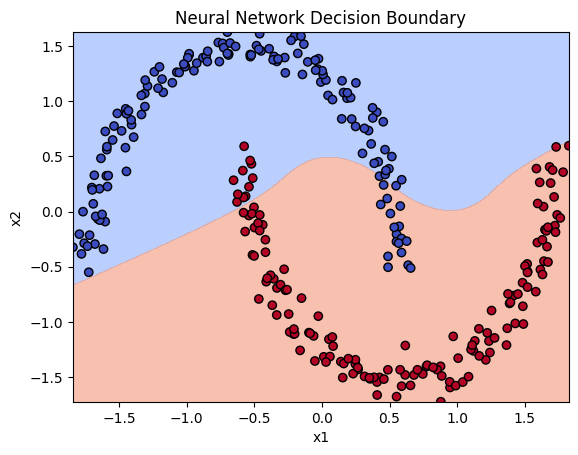

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load training data
data = pd.read_csv(r'classification_training.csv')
X = data[['x1', 'x2']].values
y = data['y'].values.reshape(-1, 1)

# Normalize input data
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

# Training function
def train_nn(X, y, hidden_size, learning_rate, epochs=1000):
    input_size = X.shape[1]
    output_size = 1  # Binary classification

    # Initialize weights and biases
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    for epoch in range(epochs):
        # Forward pass
        Z1 = np.dot(X, W1) + b1
        A1 = tanh(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)

        # Loss (binary cross-entropy)
        loss = -np.mean(y * np.log(A2 + 1e-8) + (1 - y) * np.log(1 - A2 + 1e-8))

        # Backpropagation
        dZ2 = A2 - y
        dW2 = np.dot(A1.T, dZ2) / len(X)
        db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * tanh_derivative(Z1)
        dW1 = np.dot(X.T, dZ1) / len(X)
        db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

        # Update weights and biases
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    return W1, b1, W2, b2, loss

# Hyperparameter search
hidden_sizes = [5, 10, 15]
learning_rates = [0.01, 0.05, 0.1]
best_loss = float('inf')
best_params = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        W1, b1, W2, b2, loss = train_nn(X, y, hidden_size, lr)
        print(f"Hidden size: {hidden_size}, Learning rate: {lr}, Loss: {loss:.4f}")
        if loss < best_loss:
            best_loss = loss
            best_params = {'hidden_size': hidden_size, 'learning_rate': lr, 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

print(f"Best params: {best_params}, Best loss: {best_loss:.4f}")

# Extract the best parameters
W1, b1, W2, b2 = best_params['W1'], best_params['b1'], best_params['W2'], best_params['b2']

# Visualize decision boundary
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
grid_points_norm = (grid_points - X_mean) / X_std

Z1_grid = np.dot(grid_points_norm, W1) + b1
A1_grid = tanh(Z1_grid)
Z2_grid = np.dot(A1_grid, W2) + b2
A2_grid = sigmoid(Z2_grid)
decision_boundary = A2_grid.reshape(x1_grid.shape)

plt.contourf(x1_grid, x2_grid, decision_boundary, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='coolwarm', edgecolors='k')
plt.title("Neural Network Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


Test Loss: 0.08071267748629049 Test Accuracy: 0.9875


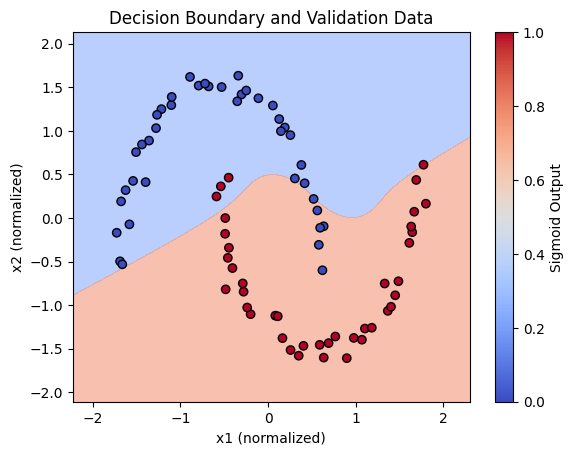

In [54]:
data = pd.read_csv(r'classification_test.csv')
X_val = data[['x1', 'x2']].values
y_val = data['y'].values.reshape(-1, 1)

# Normalize input data
X_mean, X_std = X_val.mean(axis=0), X_val.std(axis=0)
X_val = (X_val - X_mean) / X_std

def evaluate_nn(X, y, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    loss = -np.mean(y * np.log(A2 + 1e-8) + (1 - y) * np.log(1 - A2 + 1e-8))
    predictions = (A2 > 0.5).astype(int)
    accuracy = np.mean(predictions == y)
    return loss, accuracy

# Decision boundary visualization
def plot_decision_boundary(X_val, y_val, W1, b1, W2, b2):
    # Generate a grid over the feature space
    x1_min, x1_max = X_val[:, 0].min() - 0.5, X_val[:, 0].max() + 0.5
    x2_min, x2_max = X_val[:, 1].min() - 0.5, X_val[:, 1].max() + 0.5
    x1_range = np.linspace(x1_min, x1_max, 100)
    x2_range = np.linspace(x2_min, x2_max, 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

    # Flatten the grid points for evaluation
    grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]

    # Normalize the grid points
    grid_points_norm = (grid_points - X_mean) / X_std

    # Forward pass through the trained network
    Z1_grid = np.dot(grid_points_norm, W1) + b1
    A1_grid = tanh(Z1_grid)
    Z2_grid = np.dot(A1_grid, W2) + b2
    A2_grid = sigmoid(Z2_grid)

    # Reshape predictions to match the grid
    decision_boundary = A2_grid.reshape(x1_grid.shape)

    # Plot the decision boundary
    plt.contourf(x1_grid, x2_grid, decision_boundary, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
    
    # Plot validation data points
    plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val.ravel(), cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary and Validation Data")
    plt.xlabel("x1 (normalized)")
    plt.ylabel("x2 (normalized)")
    plt.colorbar(label="Sigmoid Output")
    plt.show()

# Call the function to plot
test_loss, test_accuracy = evaluate_nn(X_val, y_val, W1, b1, W2, b2)
print("Test Loss:", test_loss, "Test Accuracy:", test_accuracy)
plot_decision_boundary(X_val, y_val, W1, b1, W2, b2)



Hidden size: 5, Learning rate: 0.01, Lambda1: 0.0, Lambda2: 0.0, Loss: 0.4464
Hidden size: 5, Learning rate: 0.01, Lambda1: 0.0, Lambda2: 0.001, Loss: 0.4509
Hidden size: 5, Learning rate: 0.01, Lambda1: 0.0, Lambda2: 0.01, Loss: 0.4884
Hidden size: 5, Learning rate: 0.01, Lambda1: 0.001, Lambda2: 0.0, Loss: 0.4863
Hidden size: 5, Learning rate: 0.01, Lambda1: 0.001, Lambda2: 0.001, Loss: 0.4907
Hidden size: 5, Learning rate: 0.01, Lambda1: 0.001, Lambda2: 0.01, Loss: 0.5278
Hidden size: 5, Learning rate: 0.01, Lambda1: 0.01, Lambda2: 0.0, Loss: 0.6932
Hidden size: 5, Learning rate: 0.01, Lambda1: 0.01, Lambda2: 0.001, Loss: 0.6932
Hidden size: 5, Learning rate: 0.01, Lambda1: 0.01, Lambda2: 0.01, Loss: 0.6932
Hidden size: 5, Learning rate: 0.05, Lambda1: 0.0, Lambda2: 0.0, Loss: 0.2649
Hidden size: 5, Learning rate: 0.05, Lambda1: 0.0, Lambda2: 0.001, Loss: 0.2733
Hidden size: 5, Learning rate: 0.05, Lambda1: 0.0, Lambda2: 0.01, Loss: 0.3351
Hidden size: 5, Learning rate: 0.05, Lambda

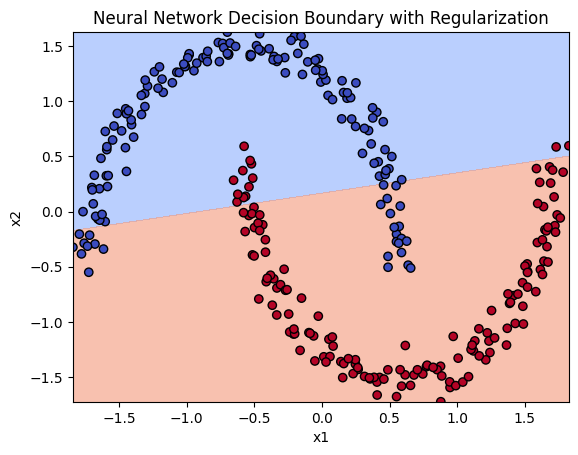

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load training data
data = pd.read_csv(r'classification_training.csv')
X = data[['x1', 'x2']].values
y = data['y'].values.reshape(-1, 1)

# Normalize input data
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

# Training function with L1 and L2 regularization
def train_nn(X, y, hidden_size, learning_rate, lambda1=0.0, lambda2=0.0, epochs=1000):
    input_size = X.shape[1]
    output_size = 1  # Binary classification

    # Initialize weights and biases
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))

    for epoch in range(epochs):
        # Forward pass
        Z1 = np.dot(X, W1) + b1
        A1 = tanh(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)

        # Loss (binary cross-entropy) with regularization
        loss = -np.mean(y * np.log(A2 + 1e-8) + (1 - y) * np.log(1 - A2 + 1e-8))
        # Add L1 and L2 regularization to loss
        loss += lambda1 * (np.sum(np.abs(W1)) + np.sum(np.abs(W2)))
        loss += lambda2 * (np.sum(W1**2) + np.sum(W2**2))

        # Backpropagation
        dZ2 = A2 - y
        dW2 = (np.dot(A1.T, dZ2) / len(X)) + lambda1 * np.sign(W2) + 2 * lambda2 * W2
        db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * tanh_derivative(Z1)
        dW1 = (np.dot(X.T, dZ1) / len(X)) + lambda1 * np.sign(W1) + 2 * lambda2 * W1
        db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

        # Update weights and biases
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    return W1, b1, W2, b2, loss

# Hyperparameter search
hidden_sizes = [5, 10, 15]
learning_rates = [0.01, 0.05, 0.1]
lambda1_values = [0.0, 0.001, 0.01]  # L1 regularization strengths
lambda2_values = [0.0, 0.001, 0.01]  # L2 regularization strengths

best_loss = float('inf')
best_params = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        for lambda1 in lambda1_values:
            for lambda2 in lambda2_values:
                W1, b1, W2, b2, loss = train_nn(X, y, hidden_size, lr, lambda1, lambda2)
                print(f"Hidden size: {hidden_size}, Learning rate: {lr}, Lambda1: {lambda1}, Lambda2: {lambda2}, Loss: {loss:.4f}")
                if loss < best_loss:
                    best_loss = loss
                    best_params = {
                        'hidden_size': hidden_size,
                        'learning_rate': lr,
                        'lambda1': lambda1,
                        'lambda2': lambda2,
                        'W1': W1,
                        'b1': b1,
                        'W2': W2,
                        'b2': b2
                    }

print(f"\nBest params: Hidden size={best_params['hidden_size']}, Learning rate={best_params['learning_rate']}, Lambda1={best_params['lambda1']}, Lambda2={best_params['lambda2']}, Best loss: {best_loss:.4f}")

# Extract the best parameters
W1, b1, W2, b2 = best_params['W1'], best_params['b1'], best_params['W2'], best_params['b2']

# Visualize decision boundary
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
grid_points_norm = (grid_points - X_mean) / X_std

Z1_grid = np.dot(grid_points_norm, W1) + b1
A1_grid = tanh(Z1_grid)
Z2_grid = np.dot(A1_grid, W2) + b2
A2_grid = sigmoid(Z2_grid)
decision_boundary = A2_grid.reshape(x1_grid.shape)

plt.contourf(x1_grid, x2_grid, decision_boundary, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='coolwarm', edgecolors='k')
plt.title("Neural Network Decision Boundary with Regularization")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
